**Tarea 8.- Series de tiempo (Univariable)**
- Baiza Orona Karen Bibiana
- Maldonado Arana Victor Josue



- Dataset - AirPassengers.csv


In [ ]:
import numpy as np
#Libreria para la manipulación y análisis de datos, sirve para la lectura e importación de la información en formato csv
import pandas as pd
#Libreria que contiene la estructura principal de pandas.
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
dataset = pd.read_csv('AirPassengers.csv')
print(dataset.head)

FileNotFoundError: [Errno 2] No such file or directory: 'AirPassengers.csv'

In [ ]:
# Seleccionamos las columnas relevantes para el análisis
# En este caso, trabajaremos con 'maximum temperature', 'minimum temperature', 'average temperature'
dataset = dataset[['Month', '#Passengers']]


print(dataset)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


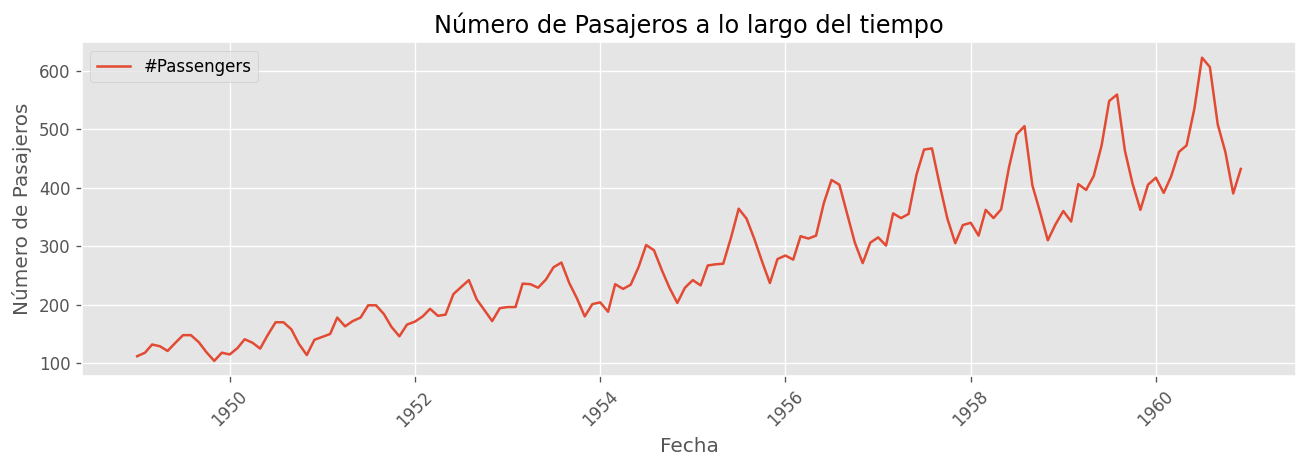

In [ ]:
# Datos originales
# Convertir la columna 'Month' a formato datetime
dataset['Month'] = pd.to_datetime(dataset['Month'], format='%Y-%m')  # El formato 'YYYY-MM'

# Graficar los datos
plt.figure(figsize=(11, 4), dpi=120)
plt.style.use("ggplot")
plt.plot(dataset['Month'], dataset['#Passengers'], label='#Passengers')

plt.title('Número de Pasajeros a lo largo del tiempo')   # Título del gráfico
plt.xlabel('Fecha')                                      # Etiqueta del eje X
plt.ylabel('Número de Pasajeros')                        # Etiqueta del eje Y
plt.legend()                                             # Mostrar la leyenda
plt.xticks(rotation=45)                                  # Rotar las fechas para mejor visibilidad
plt.tight_layout()                                       # Ajustar el diseño para evitar que se recorten las etiquetas
plt.show()


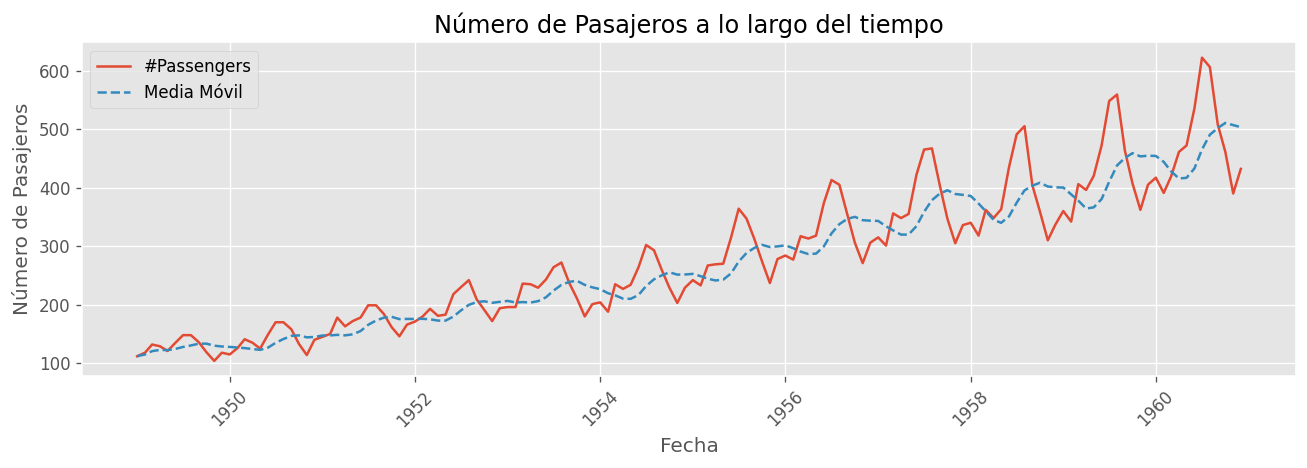

In [ ]:
# Aplicar la media móvil
dataset_soft = dataset.copy()  # Crear una copia para no modificar el dataset original
dataset_soft['#Passengers'] = dataset['#Passengers'].rolling(window=8, min_periods=1).mean()

# Graficar los datos
plt.figure(figsize=(11, 4), dpi=120)
plt.style.use("ggplot")
# Graficar los datos originales
plt.plot(dataset['Month'], dataset['#Passengers'], label='#Passengers')
# Graficar los datos con la media móvil
plt.plot(dataset['Month'], dataset_soft['#Passengers'], label='Media Móvil', linestyle='--')
plt.title('Número de Pasajeros a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')                                     # Etiqueta del eje X
plt.ylabel('Número de Pasajeros')                        # Etiqueta del eje Y
plt.legend()                                             # Mostrar la leyenda
plt.xticks(rotation=45)                                  # Rotar las fechas para mejor visibilidad
plt.tight_layout()                                       # Ajustar el diseño para evitar que se recorten las etiquetas
plt.show()

In [ ]:
def series_to_supervised(data, w=1, h=1, dropnan= True):
  n_variables = 1 if type(data) is list else data.shape[1]
  print(n_variables)
  df = DataFrame(data)
  cols, names = [], []
  #Datos de entrada, secuencia temporal (t-w, ..., t)
  for i in range(w, 0, -1):
    cols.append(df.shift(i))
    if i-1 == 0:
      names += [('Var {} (t)'.format(j+1)) for j in range(n_variables)]
    else:
      names += [('Var {} (t-{})'.format(j+1, i-1)) for j in range(n_variables)]
  #Datos de pronóstico, salida esperada (t+1, ..., t+h)
  for i in range(h):
    cols.append(df.shift(-1))
    names += [('Var {} (t+{})'.format(j+1, i+1)) for j in range(n_variables)]
  #Concatenar información
  agg = pd.concat(cols, axis= 1)
  agg.columns = names
  if dropnan:
    agg.dropna(inplace= True)
  return agg

In [ ]:
# Definir los parámetros
window_size = 5  # Tamaño de la ventana
horizon = 1      # Horizonte de predicción
var_num = 1      # Número de variables (en este caso solo 1 columna, #Passengers)

# Convertir a formato supervisado
dataset_serialized = series_to_supervised(dataset, window_size, horizon, dropnan=True)

# Mostrar el dataset serializado
print(dataset_serialized)

2
    Var 1 (t-4)  Var 2 (t-4) Var 1 (t-3)  Var 2 (t-3) Var 1 (t-2)  \
5    1949-01-01        112.0  1949-02-01        118.0  1949-03-01   
6    1949-02-01        118.0  1949-03-01        132.0  1949-04-01   
7    1949-03-01        132.0  1949-04-01        129.0  1949-05-01   
8    1949-04-01        129.0  1949-05-01        121.0  1949-06-01   
9    1949-05-01        121.0  1949-06-01        135.0  1949-07-01   
..          ...          ...         ...          ...         ...   
138  1960-02-01        391.0  1960-03-01        419.0  1960-04-01   
139  1960-03-01        419.0  1960-04-01        461.0  1960-05-01   
140  1960-04-01        461.0  1960-05-01        472.0  1960-06-01   
141  1960-05-01        472.0  1960-06-01        535.0  1960-07-01   
142  1960-06-01        535.0  1960-07-01        622.0  1960-08-01   

     Var 2 (t-2) Var 1 (t-1)  Var 2 (t-1)  Var 1 (t)  Var 2 (t) Var 1 (t+1)  \
5          132.0  1949-04-01        129.0 1949-05-01      121.0  1949-07-01   
6          

In [ ]:
# Asegurarse de que solo se usen las columnas numéricas para la normalización
dataset_numeric = dataset_serialized.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas numéricas

# Normalizar solo las columnas numéricas
dataset_normalizado = preprocessing.minmax_scale(dataset_numeric, feature_range=(0, 1))

# Imprimir el dataset normalizado
print(dataset_normalizado)

[[0.01758242 0.02702703 0.05405405 0.04826255 0.03281853 0.08494208]
 [0.03076923 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.06153846 0.04826255 0.03281853 0.05984556 0.08494208 0.06177606]
 [0.05494505 0.03281853 0.05984556 0.08494208 0.08494208 0.02895753]
 [0.03736264 0.05984556 0.08494208 0.08494208 0.06177606 0.        ]
 [0.06813187 0.08494208 0.08494208 0.06177606 0.02895753 0.02702703]
 [0.0967033  0.08494208 0.06177606 0.02895753 0.         0.02123552]
 [0.0967033  0.06177606 0.02895753 0.         0.02702703 0.04247104]
 [0.07032967 0.02895753 0.         0.02702703 0.02123552 0.07142857]
 [0.03296703 0.         0.02702703 0.02123552 0.04247104 0.05984556]
 [0.         0.02702703 0.02123552 0.04247104 0.07142857 0.04054054]
 [0.03076923 0.02123552 0.04247104 0.07142857 0.05984556 0.08687259]
 [0.02417582 0.04247104 0.07142857 0.05984556 0.04054054 0.12741313]
 [0.04835165 0.07142857 0.05984556 0.04054054 0.08687259 0.12741313]
 [0.08131868 0.05984556 0.04054054

In [ ]:
print(dataset_normalizado.shape)
dataset_normalizado = dataset_normalizado.reshape(dataset_normalizado.shape[0], var_num, window_size+horizon)
print(dataset_normalizado.shape)

(138, 6)
(138, 1, 6)


In [ ]:
x = dataset_normalizado[:, :,:-horizon]
y = dataset_normalizado[:, :, -horizon:]

#Dividimos la información en dos partes, la información que será utilzada para entrenamiento y la información para probar la calidad del aprendizaje
#Existen diferentes puntos de vista cuanto porcentaje para cada uno, pero aquí se utilizará 80% para entrenamiento y 20% para pruebas.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=22)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= .2, random_state=22)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(88, 1, 5)
(22, 1, 5)
(28, 1, 5)
(88, 1, 1)
(22, 1, 1)
(28, 1, 1)


Construcción del modelo y entrenamiento

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation = 'relu', input_shape=(x_train.shape[1], x_train.shape[2]))) # importante declarar correctamente shape
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(horizon, activation = 'sigmoid'))     # función de activación para la neurona de salida

#Se compila el modelo y se define el optimizador y metricas a utilizar
model.compile(loss = 'mse', optimizer = 'adam', metrics=['mse'])

#Se entrena el modelo y se almacena en una variable los resultados del entrenamiento.
history = model.fit(x_train, y_train, epochs=100, batch_size=24, validation_data=(x_val, y_val), verbose=1, shuffle=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0826 - mse: 0.0826 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0798 - mse: 0.0798 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0747 - mse: 0.0747 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0534 - val_mse: 0.0534
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0631 - mse: 

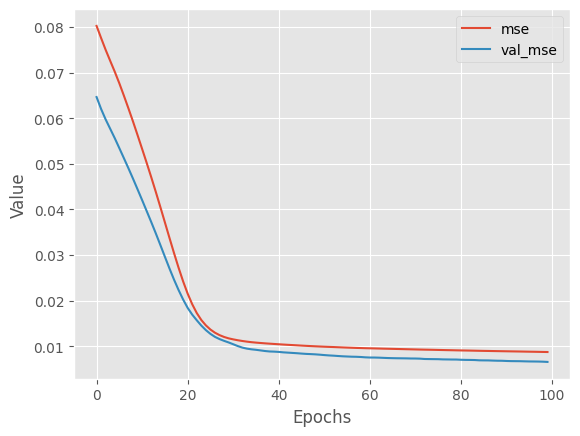

In [ ]:
# Evaluación del modelo
plt.style.use("ggplot")
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#Se evalua el modelo
aciertos = model.evaluate(x_test, y_test, verbose=0)
print('Perdida:', aciertos[0])

Perdida: 0.012402983382344246


In [ ]:
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[[0.4816155 ]]

 [[0.21396099]]

 [[0.62284243]]

 [[0.14181006]]

 [[0.6915197 ]]]


In [ ]:
# Predicciones
preds = predictions.reshape(predictions.shape[0], horizon)
y_original = y_test.reshape(y_test.shape[0], horizon)

print(preds[:5])  # Verifica los primeros 5 elementos

[[0.4816155 ]
 [0.21396099]
 [0.62284243]
 [0.14181006]
 [0.6915197 ]]


Gráficas de predicciones


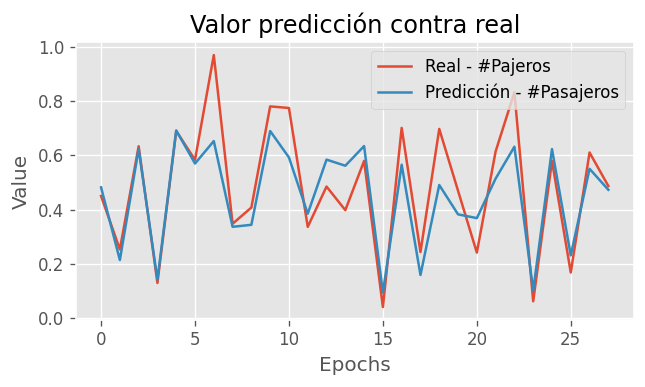

In [ ]:
#Se gráfican los resultados
plt.figure(num=None, figsize=(6, 3), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_original[0:100,0], label='Real - #Pajeros')
plt.plot(preds[0:100,0], label='Predicción - #Pasajeros')
plt.title('Valor predicción contra real')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()